In [13]:
data = pd.read_csv('/kaggle/input/llm-detect-1/final_train.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346977 entries, 0 to 346976
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    346977 non-null  object
 1   label   346977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ MB


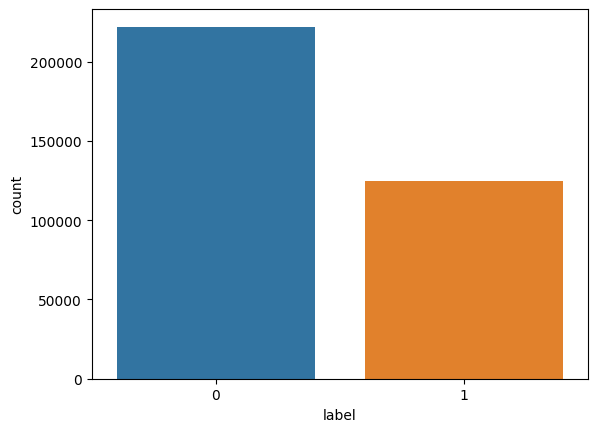

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data, x='label')
plt.show()

In [16]:
data.head()

,text,label
0,We should keep the Electoral College for a num...,0
1,More and more money is spent on building theat...,1
2,Limiting car usage can actually be effective b...,0
3,"Dear Mrs. Smith,\n\nI am writing to you today ...",1
4,"Dear Principal,\n\nAfter school or during scho...",0


In [20]:
def data_balancing(df):
    filtered_data = pd.DataFrame()

    for label in df['label'].unique():
    
        label_rows = df[df['label'] == label].head(120000)
    
        filtered_data = pd.concat([filtered_data, label_rows])
    return filtered_data

In [27]:
filtered_data = data_balancing(data)

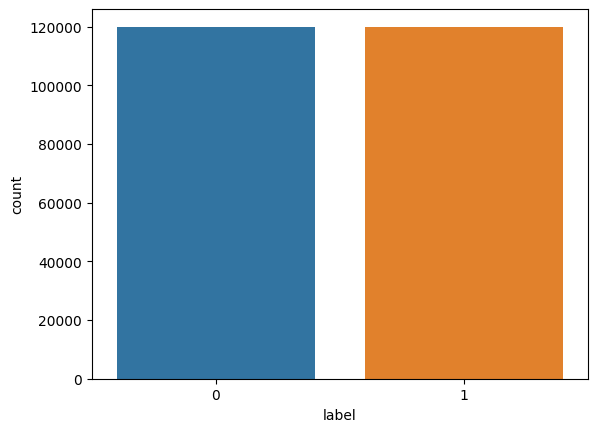

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=filtered_data, x='label')
plt.show()

In [30]:
filtered_data.to_csv('filtered_data.csv', index=False)

In [31]:
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split() 
    words = [word.lower() for word in words if word.isalpha()] 
    words = [word for word in words if word not in stop_words]  
    return ' '.join(words)

In [32]:
filtered_data['clean_text'] = filtered_data['text'].apply(clean_text)

In [34]:
filtered_data.head()

,text,label,clean_text
0,We should keep the Electoral College for a num...,0,keep electoral college number reasons usually ...
2,Limiting car usage can actually be effective b...,0,limiting car usage actually effective belief l...
4,"Dear Principal,\n\nAfter school or during scho...",0,dear principal school school activities like b...
5,"Many people think that aliens are real, but th...",0,many people think aliens real theyre many peop...
8,I think if a student has a C average he or she...,0,think student c average may able participate s...


In [35]:
filtered_data.to_csv('filtered_data_clean.csv', index=False)